In [12]:
import pickle
from typing import List, Dict

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path

In [44]:
mnist_filepaths = {
    350: 'mnist/out/mnist_350_20220513-162152.pickle',
    630: 'mnist/out/mnist_630_20220513-162152.pickle',
    1136: 'mnist/out/mnist_1136_20220513-162152.pickle',
    2046: 'mnist/out/mnist_2046_20220513-162152.pickle',
    3687: 'mnist/out/mnist_3687_20220513-162152.pickle',
    6643: 'mnist/out/mnist_6643_20220513-162152.pickle',
    11969: 'mnist/out/mnist_11969_20220513-203630.pickle',
    21565: 'mnist/out/mnist_21565_20220513-203630.pickle',
    38853: 'mnist/out/mnist_38853_20220513-203630.pickle',
    70000: 'mnist/out/mnist_70000_20220515-185834.pickle',

}
cifar_dates = ['20220514-220438', '20220515-174248']
cifar_filepaths = {
    250: 'cifar10/out/cifar_250_20220514-220438.pickle',
    450: 'cifar10/out/cifar_450_20220514-220438.pickle',
    811: 'cifar10/out/cifar_811_20220514-220438.pickle',
    1462: 'cifar10/out/cifar_1462_20220514-220438.pickle',
    2634: 'cifar10/out/cifar_2634_20220514-220438.pickle',
    4745: 'cifar10/out/cifar_4745_20220514-220438.pickle',
    8549: 'cifar10/out/cifar_8549_20220514-220438.pickle',
    15403: 'cifar10/out/cifar_15403_20220514-220438.pickle',
    27752: 'cifar10/out/cifar_27752_20220514-220438.pickle',
    50000: 'cifar10/out/cifar_50000_20220514-220438.pickle',
}
cifar_filepaths = { key: [f"cifar10/out/cifar_{key}_{date}.pickle" for date in cifar_dates] for key in cifar_filepaths.keys() }
house_filepaths = {
    101: 'house/out/house_101_20220512-201443.pickle',
    182: 'house/out/house_182_20220512-201443.pickle',
    329: 'house/out/house_329_20220512-201443.pickle',
    593: 'house/out/house_593_20220512-201443.pickle',
    1070: 'house/out/house_1070_20220512-201443.pickle',
    1927: 'house/out/house_1927_20220512-201443.pickle',
    3473: 'house/out/house_3473_20220512-201443.pickle',
    6257: 'house/out/house_6257_20220512-214341.pickle',
    11274: 'house/out/house_11274_20220512-214341.pickle',
    20313: 'house/out/house_20313_20220516-075525.pickle',
}

In [45]:
def load_old(paths: Dict[int, str]):
    def load_paths(paths):
        for n_train_samples, path in paths.items():
            with open(Path.cwd().parent / path, 'rb') as f:
                for model, result in pickle.load(f).items():
                    df = pd.DataFrame(index=range(len(result)))
                    df['model'] = model
                    df['test_score_mean'] = np.mean(result['test_score'])
                    df['train_score_mean'] = np.mean(result['train_score'])
                    df['fit_time_mean'] = np.mean(result['fit_time'])
                    df['n_used_train_samples'] = np.mean(result['n_used_train_samples'])
                    yield df

def load(all_paths: Dict[int, str]):
    def load_paths(all_paths):
        for _, paths in all_paths.items():
            if type(paths) is str:
                paths = [paths]
            for path in paths:
                with open(Path.cwd().parent / path, 'rb') as f:
                    for model, measurements in pickle.load(f).items():
                        df = pd.DataFrame(index=range(len(measurements)))
                        df['model'] = model
                        df['test_score_mean'] = np.mean(measurements['test_score'])
                        df['train_score_mean'] = np.mean(measurements['train_score'])
                        df['fit_time_mean'] = np.mean(measurements['fit_time'])
                        df['n_used_train_samples'] = np.mean(measurements['n_used_train_samples'])
                        yield df

    df = pd.concat(load_paths(all_paths), axis=0, ignore_index=True)

    return df

house_df = load(house_filepaths)
cifar_df = load(cifar_filepaths)
mnist_df = load(mnist_filepaths)

In [34]:
def plot_y(df: pd.DataFrame, y: str, x_log = False, y_log = False, ax=None):
    g = sns.lineplot(
        x='n_used_train_samples',
        y=y,
        hue='model',
        data=df,
        ax=ax,
    )
    if x_log:
        g.set(xscale='log')
        g.set_xticks(df.n_used_train_samples.values)
        for tick in g.get_xticklabels():
            tick.set_rotation(90)
        g.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    if y_log:
        g.set(yscale='log')
    return g

In [35]:
def plot_data(df, title, models):
    fig, ax = plt.subplots(1, 3, figsize=(18,6))
    fig.suptitle(title)
    ax[0].set_title('Test Score')
    ax[0].set_ylim(0, 1)
    plot_y(df.loc[df['model'].isin(models)], 'test_score_mean', x_log=True, ax=ax[0])
    ax[1].set_title('Train Score')
    ax[1].set_ylim(0, 1)
    plot_y(df.loc[df['model'].isin(models)], 'train_score_mean', x_log=True, ax=ax[1])
    ax[2].set_title('Fit time (cache)')
    plot_y(df.loc[df['model'].isin(models)], 'fit_time_mean', x_log=True, y_log=True, ax=ax[2])
    plt.show()

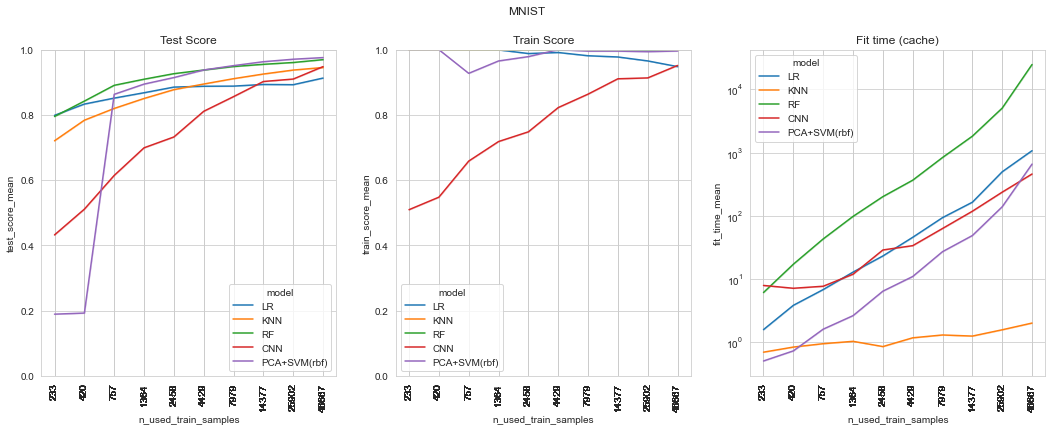

In [43]:
plot_data(mnist_df, 'MNIST', models = ['LR', 'KNN', 'RF', 'PCA+SVM(rbf)', 'NN', 'CNN'])

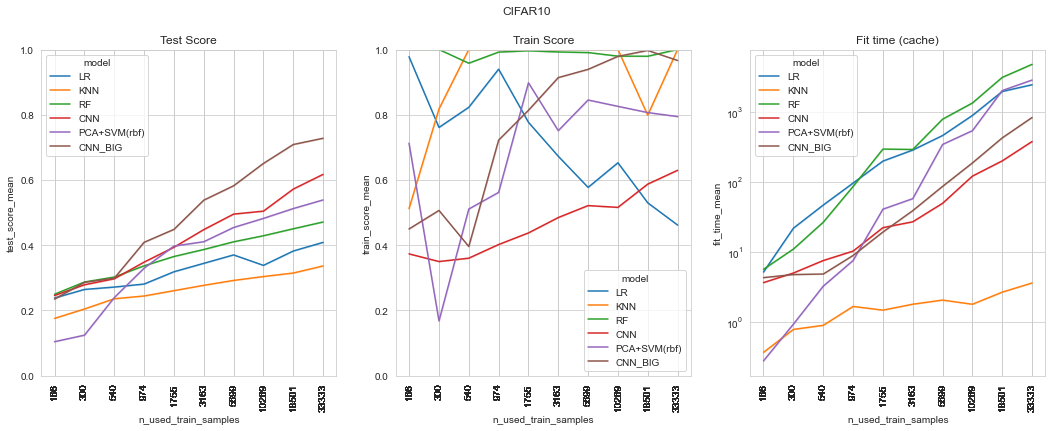

In [39]:
plot_data(cifar_df, 'CIFAR10', models = ['LR', 'KNN', 'RF', 'PCA+SVM(rbf)', 'NN', 'CNN', 'CNN_BIG'])

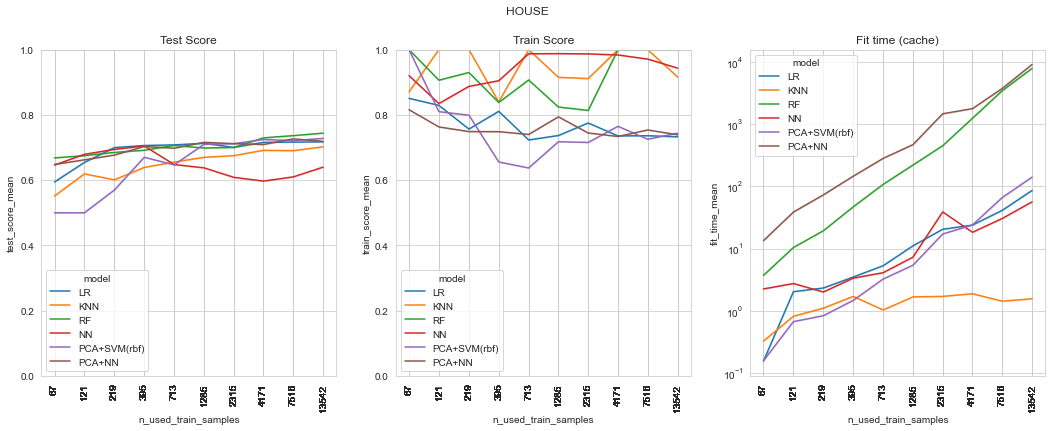

In [46]:
plot_data(house_df, 'HOUSE', models = ['LR', 'KNN', 'RF', 'PCA+SVM(rbf)', 'NN', 'PCA+NN'])